### Controllo sui dati  raw a seguito della mail di Stefano

In [1]:
from ROOT import TTree, TCanvas,TFile
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
f = TFile.Open("/home/alb/srv_lab/384/Sub_RUN_ana_0.root")

<font color=blue>Comincaimo col RUN 384
<hr>
Reminder:-tabellina corrispondenza run 
<ul>
<li>380	27</li>
<li>383	28</li>
<li>384	29</li>
<li>385	30</li>
<hr>



In [3]:
c = TCanvas("c")

In [4]:
f.tree.Draw("charge_SH:l1ts_min_tcoarse","","")


37050

<font color=blue>Plottando semplicemente carica vs Tempo, potete notare che ci sono 37050 eventi</font> 

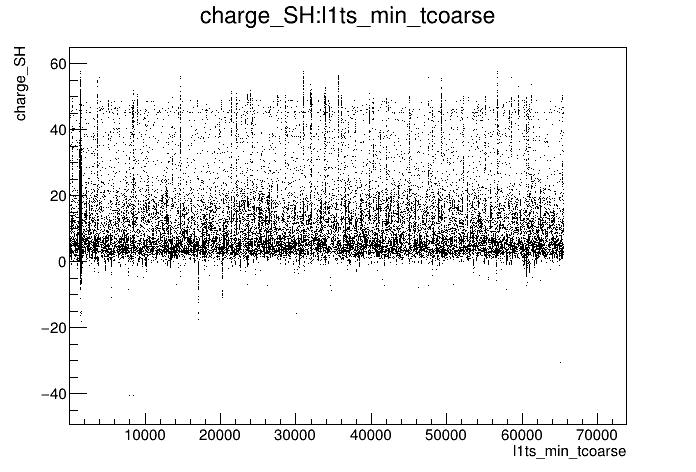

In [5]:
c.Draw()

<hr>
<font color=blue>
    Gli eventi sono distribuiti su tutti i valori possibili di l1ts_min_tcoarse, mentre dovrebbero trovarsi fra 1299 e  1569.
Proviamo a tagliare i dati "sicuramenti spurii", ovvero delta_coarse != 26 e 25


In [6]:
f.tree.Draw("charge_SH:l1ts_min_tcoarse","delta_coarse==26 || delta_coarse==25 ","")


36628

<font color=blue> Sono 36628, quindi ne abbiamo tagliati:

In [7]:
37050-36628

422

In [8]:
422/37050

0.011390013495276654

<font color=blue> 422, circa l'1% del totale

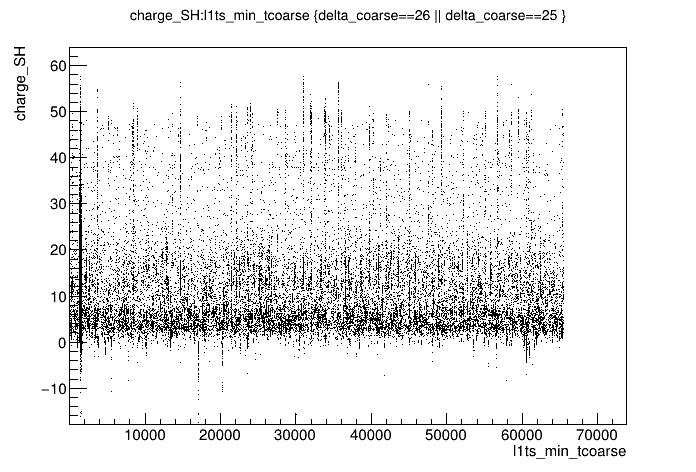

In [9]:
c.Draw()

<hr>
<font color=blue> Proviamo a vedere quanti sono i dati nella finestra corretta di trigger

In [10]:
f.tree.Draw("charge_SH:l1ts_min_tcoarse>>h(270,1299,1569,60,0,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569","colz")

10647

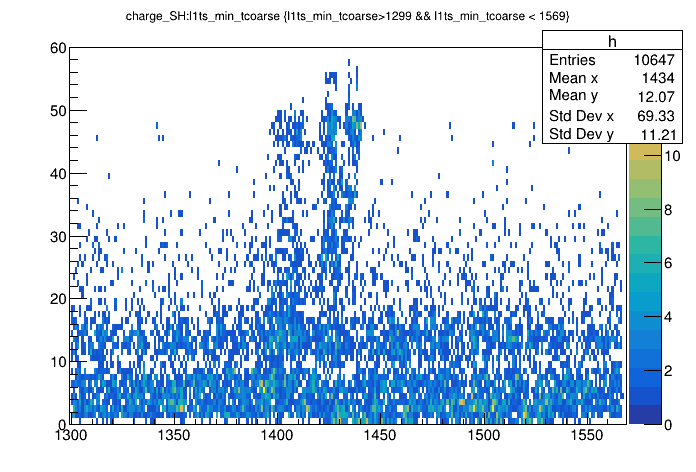

In [11]:
c.Draw()

chain.Draw("charge_SH:l1ts_min_tcoarse","","")


In [12]:
10647/37050

0.2873684210526316

<font color=blue> Solo grossomodo il 30% dei dati è nella finestra di trigger corretta. Difficile a questo punto valutare se gli hit fuori carichi fuori tempo sono stati riferiti al pacchetto, e quindi al riferimento temporale, corretti. Proviamo a vedere negli altri run:

In [13]:
f2 = TFile.Open("/home/alb/srv_lab/380/Sub_RUN_ana_1.root")
f3 = TFile.Open("/home/alb/srv_lab/383/Sub_RUN_ana_0.root")
f4 = TFile.Open("/home/alb/srv_lab/385/Sub_RUN_ana_1.root")

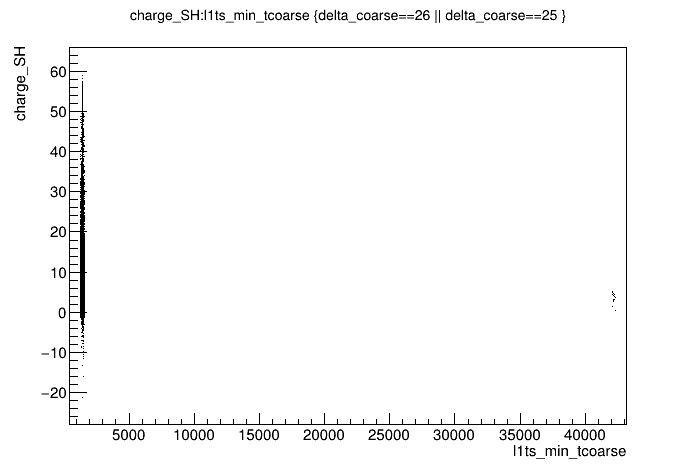

In [14]:
tot2=f2.tree.Draw("charge_SH:l1ts_min_tcoarse","delta_coarse==26 || delta_coarse==25 ","")
c.Draw()

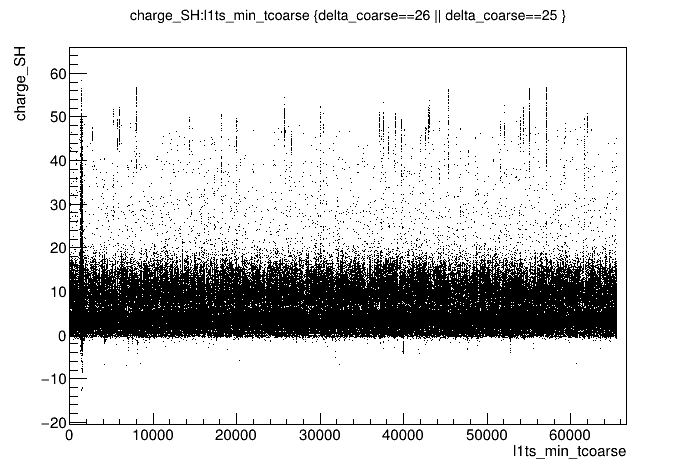

In [15]:
tot3=f3.tree.Draw("charge_SH:l1ts_min_tcoarse","delta_coarse==26 || delta_coarse==25 ","")
c.Draw()

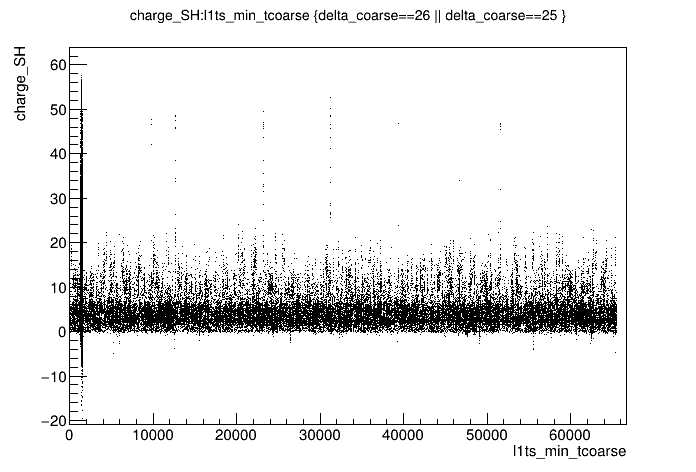

In [16]:
tot4=f4.tree.Draw("charge_SH:l1ts_min_tcoarse","delta_coarse==26 || delta_coarse==25 ","")
c.Draw()

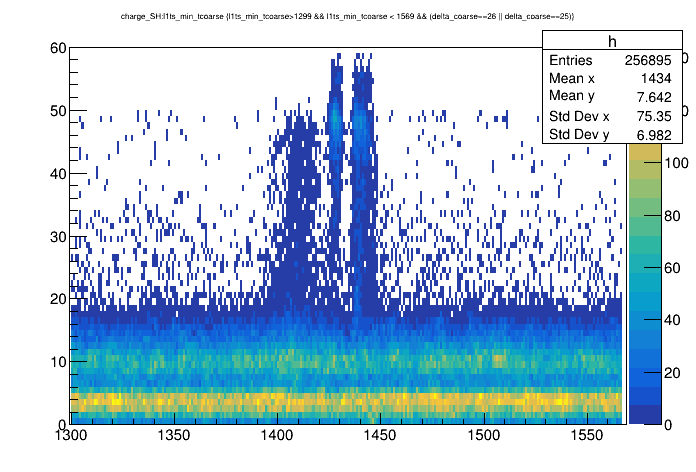

In [17]:
cut2=f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>h(270,1299,1569,60,0,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25)" ,"colz")
c.Draw()

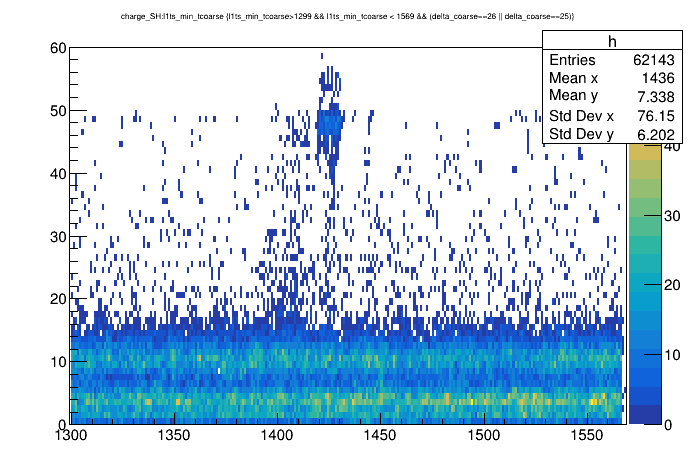

In [18]:
cut3=f3.tree.Draw("charge_SH:l1ts_min_tcoarse>>h(270,1299,1569,60,0,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25)","colz")
c.Draw()

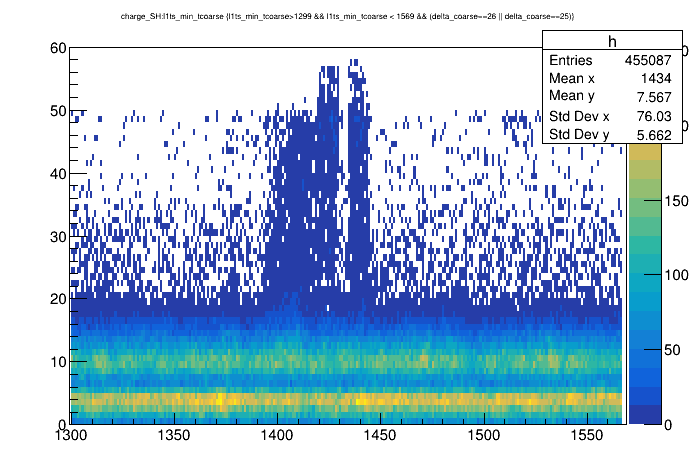

In [19]:
cut4=f4.tree.Draw("charge_SH:l1ts_min_tcoarse>>h(270,1299,1569,60,0,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25)","colz")
c.Draw()

In [20]:
r2=cut2/tot2
r3=cut3/tot3
r4=cut4/tot4

<font color=blue> Il numero di dati nella finestra corretta di trigger vs totali sono:


In [21]:
print (" run 380: {}\n run 383: {}\n run 384: {}\n run 385: {}".format(r2,r3,0.2873684210526316,r4))

 run 380: 0.9999416137947141
 run 383: 0.25298610149895373
 run 384: 0.2873684210526316
 run 385: 0.9005810110700815


<font color=blue>
    <hr>Fabio ha dato un'occhiata al 384 e l'impacchettamento sembra compromesso oltre le capacità del decode.py. <br>
Direi quindi che i run da guardare sono principalmente il 380 e il 385. Non so cosa possa aver turbato l'impacchettamento così tanto.
<hr>
<hr>

### Spunti sull'analisi temporale del run 380/27

<font color=blue>
    Tornando a guardare la carica vs il tempo nel run 380, con un taglio in carica che escluda il rumore:

In [22]:
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>h(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25)" ,"colz")


256895

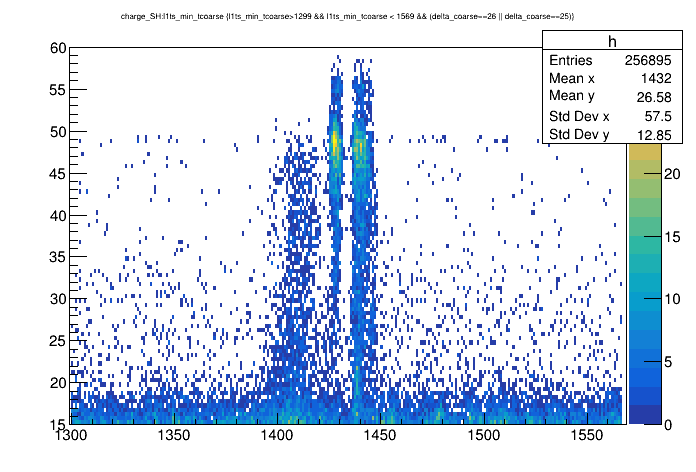

In [23]:
c.Draw()


<font color=blue>
    Oltre a qualche hit in carica totalmente fuori tempo, si nota una struttura composta da tre parti nella zona del trigger. Provo a dividere per layer (layer3=planari)

In [24]:
c1 = TCanvas("c1")
c2 = TCanvas("c2")
c3 = TCanvas("c3")


In [25]:
c1.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>L1(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25) && layer==1" ,"colz")
c1.SetTitle("L1")
c2.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>L2(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25) && layer==2" ,"colz")
c3.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>Planari(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25) && layer==0" ,"colz")


73362

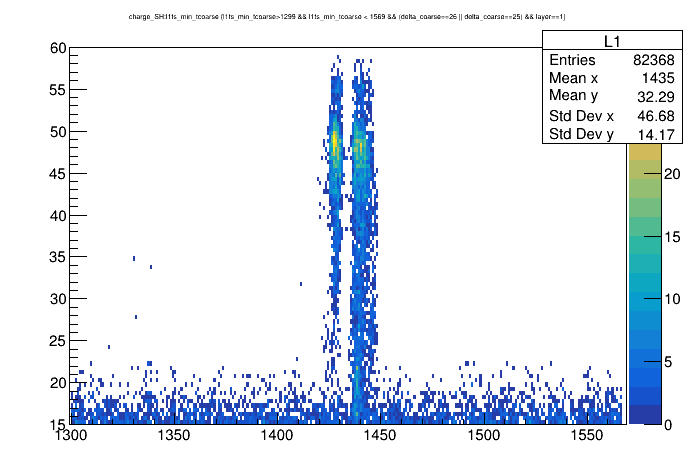

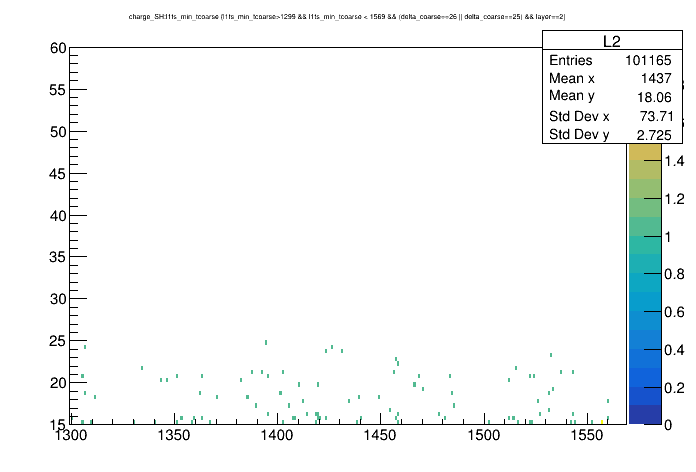

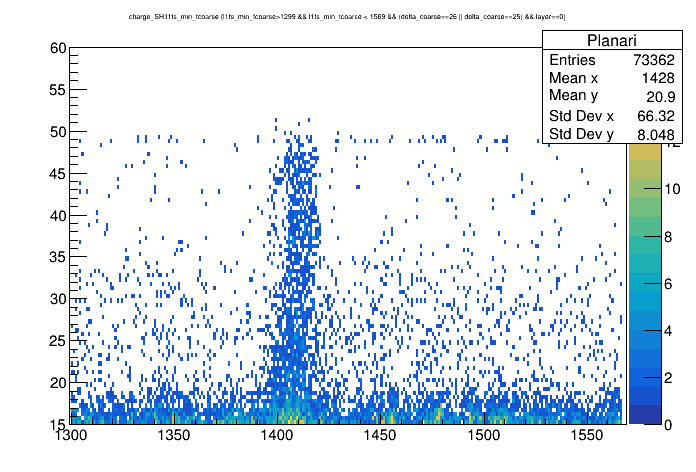

In [26]:
c1.Draw()
c2.Draw()
c3.Draw()

<font color=blue>
    Come si può vedere: <br>
L2 sembra molto più tranquillo, non mostra rumore ad alta carica e fatto salvo per pochi punti non in tempo col trigger. <br>
L1 mostra una struttura con due picchi in concomitanza col triger.  <br>
Le planari hanno sia la struttura al tempo del trigger, sia un certo numero di hit sparsi. <br>
Ribadisco che sui layer io vedo tutto il segnale in un tempo coerente con quello del trigger, più o meno dove di solito c'è il segnale. Se Stefano per i layer in questo run vede degli hit ad alta carica fuori dalla finestra 1400, 1450 (che dovrebbe corrispondente a -8750,-9062), vuol dire che questi si "creano" durante fasi successive dell'analisi. Prima di metterle da parte, faccio notare che le planari hanno un picco ritardato rispetto a quelli di L1 (vi ricordo che il tempo in L1ts_min_tocoarse scorre da dx a sx).
<hr> <hr>
Mi concentro su L1, le planari non credo siano di grande interesse. <br>
Per avere solo hit appartenenti ai due picchi, farccio un taglio brutale a 20 fc e fra 1430 e 1450 in tempo.

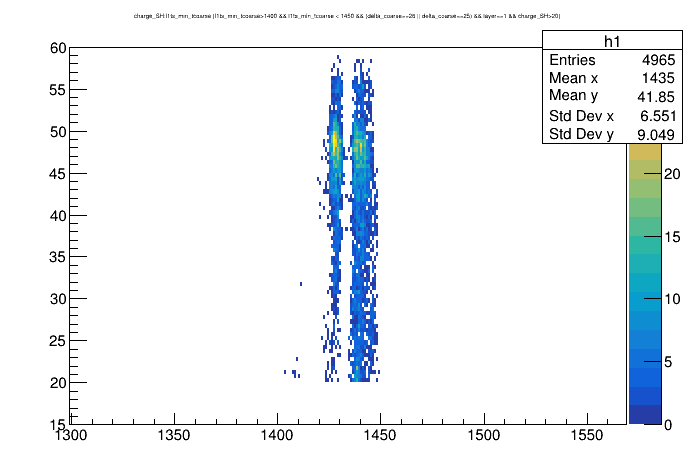

In [27]:
c.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>h1(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1400 && l1ts_min_tcoarse < 1450 && (delta_coarse==26 || delta_coarse==25) && layer==1 && charge_SH>20" ,"colz")
c.Draw()

<font color=blue> Così possiamo vedere se ha un pattern sulle GEMROCs

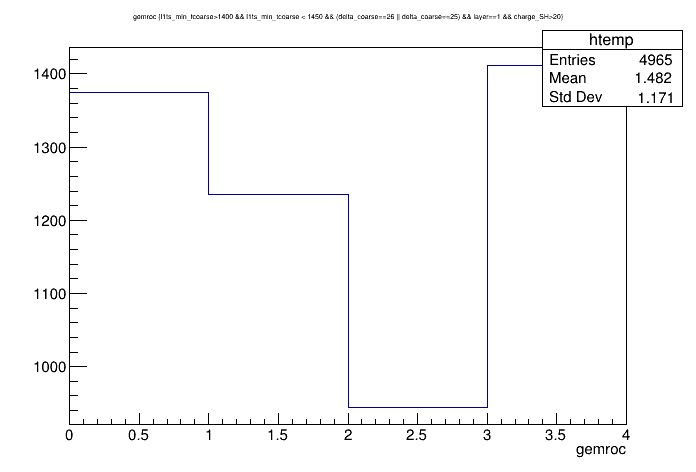

In [28]:
f2.tree.Draw("gemroc","l1ts_min_tcoarse>1400 && l1ts_min_tcoarse < 1450 && (delta_coarse==26 || delta_coarse==25) && layer==1 && charge_SH>20" ,"colz")
c.Draw()

<font color=blue> Sembra essere immune la 2, ma colpite le altre. Guardandolo per TIGER.

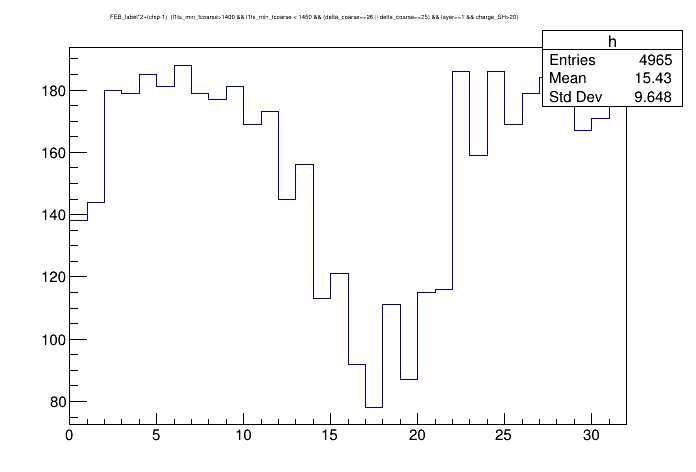

In [29]:
f2.tree.Draw("FEB_label*2+(chip-1) >>h(32,0,32)","l1ts_min_tcoarse>1400 && l1ts_min_tcoarse < 1450 && (delta_coarse==26 || delta_coarse==25) && layer==1 && charge_SH>20" ,"")
c.Draw()

<font color=blue> Sembra seguire l'andamento delle GEMROC. Andamento per canali (prima sui 64 canali di ogni chip e poi su tutti i canali di L1):

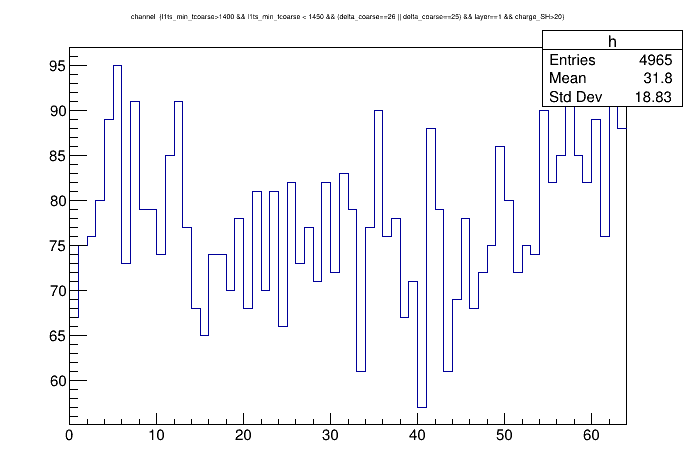

In [30]:
f2.tree.Draw("channel >>h(64,0,64)","l1ts_min_tcoarse>1400 && l1ts_min_tcoarse < 1450 && (delta_coarse==26 || delta_coarse==25) && layer==1 && charge_SH>20" ,"")
c.Draw()

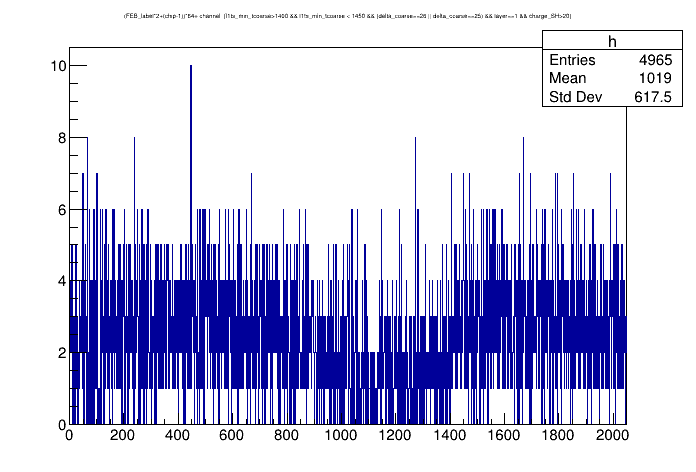

In [31]:
f2.tree.Draw("(FEB_label*2+(chip-1))*64+ channel >>h(2048,0,2048)","l1ts_min_tcoarse>1400 && l1ts_min_tcoarse < 1450 && (delta_coarse==26 || delta_coarse==25) && layer==1 && charge_SH>20" ,"")
c.Draw()

<font color=blue> Visto il (relativamente) basso numero di hit, sembrano distribuiti molto uniformemente fra i canali. Approposito di numero di hit, sono 4965 su 10044 triggers. Possiamo vedere se sono equamente distribuiti o se sono presenti sopratutto in alcuni triggers:

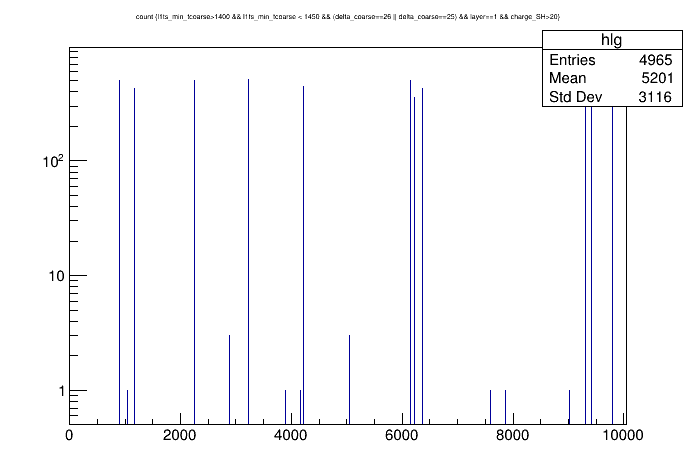

In [32]:
clog=TCanvas("clog")
hlg= ROOT.TH1F( "hlg", 'container for licount', 10044, 0, 10044) 

f2.tree.Draw("count>>hlg(10044,0,10044)","l1ts_min_tcoarse>1400 && l1ts_min_tcoarse < 1450 && (delta_coarse==26 || delta_coarse==25) && layer==1 && charge_SH>20" ,"logy")
clog.SetLogy()
clog.Draw()

<font color=blue> Direi che sono concentrati in pochi trigger. Provo a catturarli per vedere quanti sono

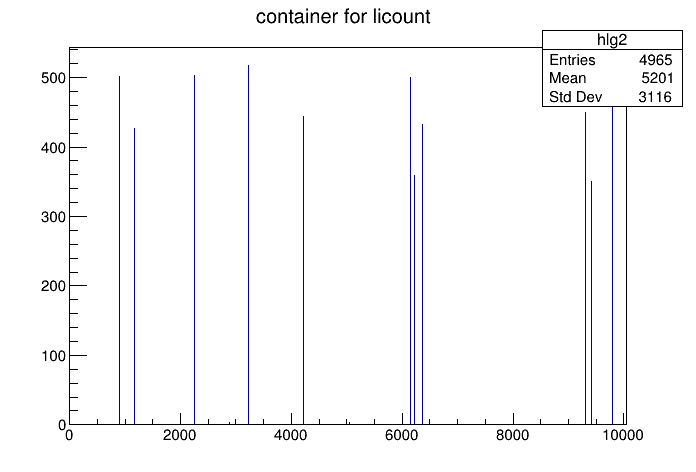

In [33]:
hlg2= ROOT.TH1I( "hlg2", 'container for licount', 10044, 0, 10044) 
c.cd()
for  entryNum  in  range(0,f2.tree.GetEntries ()):
    f2.tree.GetEntry(entryNum)
    l1ts_min_tcoarse=getattr(f2.tree ,"l1ts_min_tcoarse")
    delta_coarse=getattr(f2.tree ,"delta_coarse")
    layer=getattr(f2.tree ,"layer")
    charge_SH=getattr(f2.tree ,"charge_SH")
    count=getattr(f2.tree ,"count")

    if(l1ts_min_tcoarse>1400 and l1ts_min_tcoarse<1450 and layer==1 and delta_coarse in (25,26) and charge_SH>20) :
       hlg2.Fill(count)
    
hlg2.Draw()
c.Draw()



In [34]:
l1_overfloat= []
l1_overfloat5=[]
print ("L1_count, numero di hit")
for T in range (0,10044):
    l1=(hlg2.GetBinContent(T))
    if l1>0:
        l1_overfloat.append(T-1)
        print (T-1,int(l1))
    if l1>5:
        l1_overfloat5.append(T-1)


L1_count, numero di hit
898 501
1041 1
1174 427
2258 503
2882 3
3224 518
3887 1
4171 1
4214 444
5050 3
6147 500
6224 359
6370 432
7595 1
7862 1
9012 1
9311 450
9411 351
9799 468


In [35]:
print("Con più di 5 hit: {}, totali {}".format(len(l1_overfloat5),len(l1_overfloat) ))

Con più di 5 hit: 11, totali 19


<font color=blue> Proviamo a plottare senza gli 11 trigger con più di di 5 hit di rumore i tempo

In [36]:
stringa_aggiuntiva=""
for elem in l1_overfloat5:
    stringa_aggiuntiva +=" && count!= {}".format(elem)
print (stringa_aggiuntiva)

 && count!= 898 && count!= 1174 && count!= 2258 && count!= 3224 && count!= 4214 && count!= 6147 && count!= 6224 && count!= 6370 && count!= 9311 && count!= 9411 && count!= 9799


In [37]:
c1.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>L1(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25) && layer==1{}".format(stringa_aggiuntiva) ,"colz")
c2.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>L2(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25) && layer==2{}".format(stringa_aggiuntiva) ,"colz")

c3.cd()
f2.tree.Draw("charge_SH:l1ts_min_tcoarse>>Planari(270,1299,1569,90,15,60)","l1ts_min_tcoarse>1299 && l1ts_min_tcoarse < 1569 && (delta_coarse==26 || delta_coarse==25) && layer==0{}".format(stringa_aggiuntiva) ,"colz")


73305

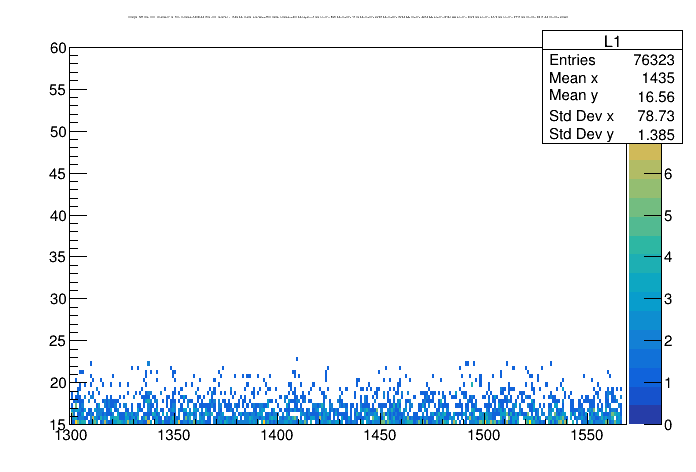

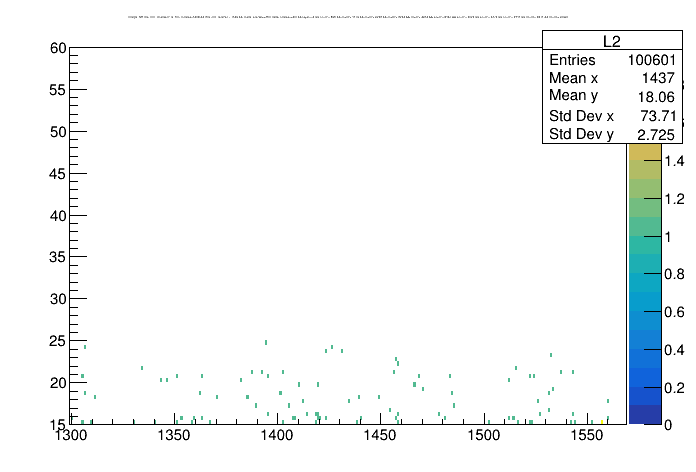

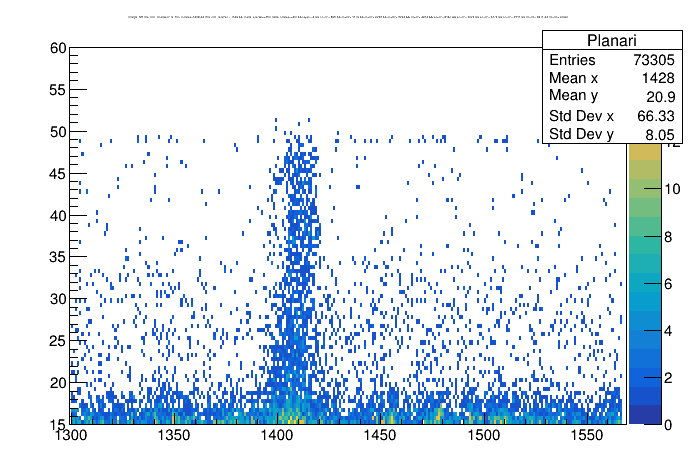

In [38]:
c1.Draw()
c2.Draw()

c3.Draw()

<font color=blue> Come vedere l'anomalia è sparita da l1, mentre sulle planari solo in parte (ma al momento lascerei così).

## Conlusioni

<font color=blue> Vanno guardati i run 27 e 30, ma capire cosa compromette ulteriolmente l'impacchettamento potrebbe aiutare a debuggarlo <br>
Gli hit di noise in tempo ad alta carica sui layer erano concentrati su pochi trigger rispetto al totale. <br> Mondato il run dai trigger rumorosi, non si vede altro rumore ad alta carica sui layer.
